# Principal component analysis (PCA) & HOG Vs SURF Vs SIFT (DAISY)

### Part 1: PCA

I first implement PCA by myself and it works for sqaure images.

In [1]:
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image
import matplotlib
# IMPORTING IMAGE USING SCIPY AND TAKING R,G,B COMPONENTS

a = matplotlib.pyplot.imread("99_Cybersecurity.jpg")
a_np = np.array(a)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

def comp_2d(image_2d,numpc): # FUNCTION FOR RECONSTRUCTING 2D MATRIX USING PCA
	cov_mat = image_2d - np.mean(image_2d , axis = 1)
	eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat)) # USING "eigh", SO THAT PROPRTIES OF HERMITIAN MATRIX CAN BE USED
	p = np.size(eig_vec, axis =1)
	idx = np.argsort(eig_val)
	idx = idx[::-1]
	eig_vec = eig_vec[:,idx]
	eig_val = eig_val[idx]
	
	if numpc <p or numpc >0:
		eig_vec = eig_vec[:, range(numpc)]
	score = np.dot(eig_vec.T, cov_mat)
	recon = np.dot(eig_vec, score) + np.mean(image_2d, axis = 1).T # SOME NORMALIZATION CAN BE USED TO MAKE IMAGE QUALITY BETTER
	recon_img_mat = np.uint8(np.absolute(recon)) # TO CONTROL COMPLEX EIGENVALUES
	return recon_img_mat

a_r_recon, a_g_recon, a_b_recon = comp_2d(a_r,100), comp_2d(a_g,100), comp_2d(a_b,100) # RECONSTRUCTING R,G,B COMPONENTS SEPARATELY
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon)) # COMBINING R.G,B COMPONENTS TO PRODUCE COLOR IMAGE
recon_color_img = Image.fromarray(recon_color_img)
recon_color_img.show()

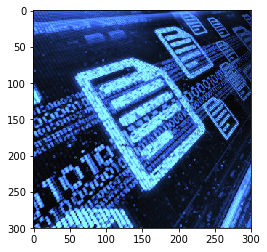

In [2]:
plt.imshow(a)

In [3]:
def generate_c(numpc):
    a_r_recon, a_g_recon, a_b_recon = comp_2d(a_r,numpc), comp_2d(a_g,numpc), comp_2d(a_b,numpc)  
    recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon)) # COMBINING R.G,B COMPONENTS TO PRODUCE COLOR IMAGE
    recon_color_img = Image.fromarray(recon_color_img)
    return recon_color_img
    

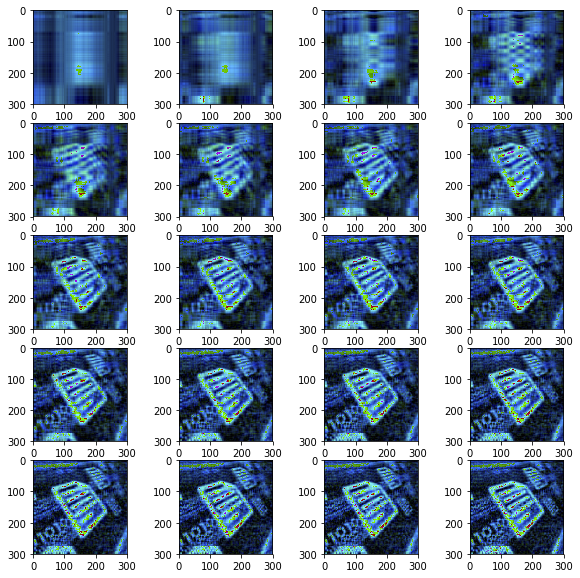

In [4]:
w=10
h=10
fig=plt.figure(figsize=(10, 10))
columns = 4
rows = 5
for i in range(1,21):
    img = generate_c(i)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

Above is the list of images based on the number of principle component I  choose(from 1-20) and we can find that only 20 principle components can reconstruct a very similar image as original. This reduce the dimension from 300 * 300 to 300 * 20. 

However, there are two problems: the first one is that the function only works for square images since the covariance and eigen values and eigen vectors need to find the inverse of matrix. The second problem is that we can not find the exact variance ratio compare to the original image. Thus I use sklearn to solve these two problems.

In [5]:
from sklearn.decomposition import PCA 
import matplotlib.image as mpimg

(350, 650, 3)


array([[[ 8, 12, 21],
        [ 6, 10, 19],
        [ 5,  9, 18],
        ...,
        [ 7, 11, 23],
        [ 4, 10, 22],
        [ 5, 11, 23]],

       [[ 7, 11, 20],
        [ 6, 10, 19],
        [ 5,  9, 18],
        ...,
        [ 1,  7, 19],
        [ 3,  9, 21],
        [ 5, 11, 23]],

       [[ 6, 10, 19],
        [ 4,  8, 17],
        [ 4,  8, 17],
        ...,
        [ 3, 11, 22],
        [ 8, 14, 26],
        [ 9, 15, 27]],

       ...,

       [[12, 23, 43],
        [14, 25, 45],
        [16, 27, 47],
        ...,
        [20, 23, 32],
        [17, 20, 29],
        [17, 20, 29]],

       [[13, 24, 44],
        [14, 25, 45],
        [15, 26, 46],
        ...,
        [21, 24, 33],
        [17, 20, 27],
        [17, 20, 27]],

       [[13, 24, 44],
        [14, 25, 45],
        [14, 25, 45],
        ...,
        [20, 23, 32],
        [17, 20, 27],
        [17, 20, 27]]], dtype=uint8)

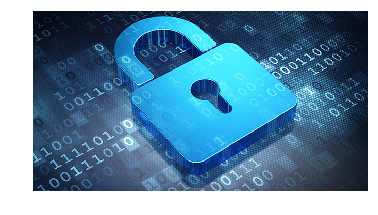

In [6]:
img = mpimg.imread('5_Cybersecurity%20Homepage%20Feature-650x350.jpg')

#Now, let's look at the size of this numpy array object img as well as plot it using imshow.

print (img.shape)
plt.axis('off')
plt.imshow(img)
img 

In [7]:

pca = PCA(.95)
img_r = np.reshape(img, (350, 1950))

In [8]:
lower_dimensional_data = pca.fit_transform(img_r)

In [9]:
pca.n_components_

84

To matain 95% variance, we need to keep 84 principle components this reduce dimension from 350 * 650 to 350 * 84

In [10]:
approximation = pca.inverse_transform(lower_dimensional_data)

In [11]:
approximation=np.reshape(approximation,(350,650,3))
print(approximation.shape)
approximation

(350, 650, 3)


array([[[ 5.27388347,  9.06841123, 17.99706099],
        [ 8.2239435 , 13.08588108, 22.28911353],
        [10.04271575, 15.39859335, 24.71794047],
        ...,
        [ 7.31366682, 14.62781508, 27.67240058],
        [ 4.47706563,  6.95317532, 16.79999774],
        [ 2.58968331,  4.81840374, 14.6248441 ]],

       [[ 8.12964262, 12.76329065, 23.65334854],
        [10.43323506, 15.05957353, 25.820002  ],
        [ 8.06014838, 12.56150393, 22.56242983],
        ...,
        [ 6.49064786, 11.67347543, 23.16660847],
        [ 5.43051097,  8.59628504, 19.07189755],
        [ 4.58454297,  7.68605118, 18.17635033]],

       [[ 9.54786346, 14.01914024, 24.58609196],
        [10.04538591, 15.45589547, 25.18932688],
        [ 9.4800312 , 14.70761806, 24.51799297],
        ...,
        [ 6.05807182,  9.23427889, 19.65419813],
        [ 4.20610341,  9.05520287, 20.52741173],
        [ 6.73827182, 11.86349584, 23.25651029]],

       ...,

       [[ 9.43689297, 17.57658633, 35.51161395],
        [13

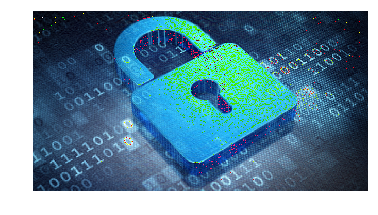

In [12]:

#Great, now lets visualize like before with imshow
plt.axis('off')
plt.imshow(approximation.astype('uint8'))

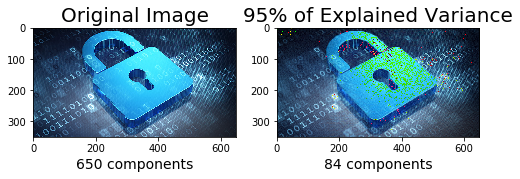

In [13]:

plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(img_r.reshape(350,650,3),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('650 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation.astype('uint8'))
plt.xlabel('84 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

In [14]:

pca2 = PCA(.85)
img_r = np.reshape(img, (350, 1950))
lower_dimensional_data_2 = pca2.fit_transform(img_r)

In [15]:
pca2.n_components_

27

To matain 85% variance, we need to keep 27 principle components this reduce dimension from 350 * 650 to 350 * 27

In [16]:
approximation2 = pca2.inverse_transform(lower_dimensional_data_2)
approximation2=np.reshape(approximation2,(350,650,3))
print(approximation2.shape)


(350, 650, 3)


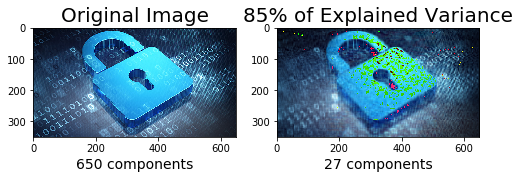

In [17]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(img_r.reshape(350,650,3),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('650 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation2.astype('uint8'))
plt.xlabel('27 components', fontsize = 14)
plt.title('85% of Explained Variance', fontsize = 20);

Conclusion: Through PCA, we can reduce a lot of dimension and keep a high variance, which make the further training process faster. However, we cannot neglect the time for PCA process, after reading the paper, the method called random projection will reach a similar effect as PCA but with a faster processing time. Further to do: run PCA or random projection for all images for trainning.

### Part 2: HOG Vs SURF Vs SIFT (DAISY)

In [18]:
import cv2
from skimage import io
#img = io.imread('image.png', as_gray=True)

In [19]:
from skimage import data, img_as_float, exposure

a = io.imread("3_Cybersecurity01_Web.jpg", as_gray=True)

a = io.imread('5_Cybersecurity%20Homepage%20Feature-650x350.jpg', as_gray=True)
camera = img_as_float(a)


hist, bin_centers = exposure.histogram(camera, nbins=10)
print(hist)
print(bin_centers)


[23493 46971 42997 30345 19248 20068 20038 16917  6040  1383]
[0.0523892  0.15207818 0.25176716 0.35145614 0.45114512 0.5508341
 0.65052308 0.75021206 0.84990104 0.94959002]


# Original gray 

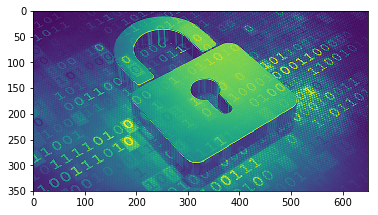

In [20]:
plt.imshow(camera)

# SIFT(DAISY)

(2, 3, 104)


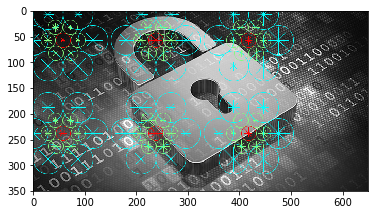

In [21]:
from skimage.feature import daisy
import matplotlib.pyplot as plt
%matplotlib inline

daisy_feat, daisy_img = daisy(camera,step=180, radius=58, rings=2, histograms=6, visualize=True)
print(daisy_feat.shape)
plt.imshow(daisy_img)


# HOG

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


(262359,)


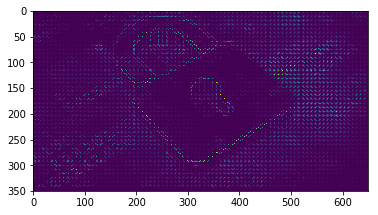

In [22]:
from skimage.feature import hog
import matplotlib.pyplot as plt
%matplotlib inline

hog_feat, hog_img = hog(camera, visualise=True)
print(hog_feat.shape)
plt.imshow(hog_img)


# SURF

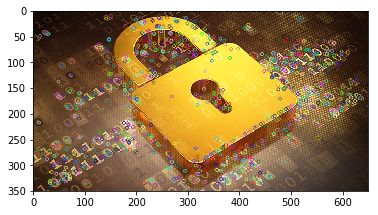

In [23]:
img = cv2.imread('5_Cybersecurity%20Homepage%20Feature-650x350.jpg')


surf = cv2.xfeatures2d.SURF_create(400)

key_query,desc_query = surf.detectAndCompute(img,None)

img=cv2.drawKeypoints(img,key_query,img)

#cv2.imshow('sp',img)
#cv2.waitKey(0)
plt.imshow(img)

Conclusion: After reading some papers, I try to analysis these three kind of feature extraction. All of three methods will give key points based on different theory(like gradient descent for HOG).  The difference is that HOG cannot keep the unifomity of rotation and size while the other two could. Further more, surf has a best time to calculate and SIFT need a much longer time. After comparsion the results above, we find tha HOG and SURF perform a lot better in cyber images. Further to do: learn more deep about these three methods and try to using SVM + HOG or SURF for traning and compare the result for deep learning.

In [31]:

im = Image.open('5_Cybersecurity%20Homepage%20Feature-650x350.jpg')
im = im.resize((224,224))
im.show()
im.save('hdz.jpg')

In [30]:
import os
from PIL import Image 
# Get all folder names
path = 'cybersec-imagery/cybersecurity'
folders = [os.path.join(path, o) for o in os.listdir(path) 
                    if os.path.isdir(os.path.join(path,o))]
folders.sort()

#Get all images names

images = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        images.append(os.path.join(r, file))

for img in images:
    if ".DS_Store" in img:
        images.remove(img)
    elif ".json" in img:
        images.remove(img)

In [32]:
images[:5]

['cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/95_Cybersecurity101_Toolkit_1170x700.jpg',
 'cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/96_cybersecurity-lock.jpeg',
 'cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/55_cybersecurity_boards-100623183-large.jpg',
 'cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/16_cyber-security-hgtc.png',
 'cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/90_cybersecurity.jpg?1438115350']

In [34]:
im = Image.open(images[0])
im.show()

In [43]:
path_save='resize-cyber/'
images_p=images[:5]
a='cyber_'
i=0
for name in images:
    i=i+1
    try:
        im = Image.open(name)
        im = im.resize((224,224))
        save_str=path_save+a+str(i)+'.jpg'
        print(save_str)
        im.save(save_str)
    except:
        pass
    

resize-cyber/cyber_1.jpg
resize-cyber/cyber_2.jpg
resize-cyber/cyber_3.jpg
resize-cyber/cyber_4.jpg
resize-cyber/cyber_5.jpg
resize-cyber/cyber_6.jpg
resize-cyber/cyber_7.jpg
resize-cyber/cyber_8.jpg
resize-cyber/cyber_9.jpg
resize-cyber/cyber_11.jpg
resize-cyber/cyber_12.jpg
resize-cyber/cyber_13.jpg
resize-cyber/cyber_14.jpg
resize-cyber/cyber_15.jpg
resize-cyber/cyber_16.jpg
resize-cyber/cyber_17.jpg
resize-cyber/cyber_19.jpg
resize-cyber/cyber_20.jpg
resize-cyber/cyber_21.jpg
resize-cyber/cyber_22.jpg
resize-cyber/cyber_23.jpg
resize-cyber/cyber_24.jpg
resize-cyber/cyber_25.jpg
resize-cyber/cyber_26.jpg
resize-cyber/cyber_27.jpg
resize-cyber/cyber_28.jpg
resize-cyber/cyber_29.jpg
resize-cyber/cyber_31.jpg
resize-cyber/cyber_32.jpg
resize-cyber/cyber_33.jpg
resize-cyber/cyber_34.jpg
resize-cyber/cyber_35.jpg
resize-cyber/cyber_36.jpg
resize-cyber/cyber_38.jpg
resize-cyber/cyber_39.jpg
resize-cyber/cyber_40.jpg
resize-cyber/cyber_41.jpg
resize-cyber/cyber_43.jpg
resize-cyber/cyber_44

resize-cyber/cyber_334.jpg
resize-cyber/cyber_335.jpg
resize-cyber/cyber_336.jpg
resize-cyber/cyber_337.jpg
resize-cyber/cyber_338.jpg
resize-cyber/cyber_340.jpg
resize-cyber/cyber_341.jpg
resize-cyber/cyber_342.jpg
resize-cyber/cyber_343.jpg
resize-cyber/cyber_344.jpg
resize-cyber/cyber_345.jpg
resize-cyber/cyber_346.jpg
resize-cyber/cyber_347.jpg
resize-cyber/cyber_348.jpg
resize-cyber/cyber_349.jpg
resize-cyber/cyber_350.jpg
resize-cyber/cyber_351.jpg
resize-cyber/cyber_352.jpg
resize-cyber/cyber_353.jpg
resize-cyber/cyber_354.jpg
resize-cyber/cyber_355.jpg
resize-cyber/cyber_356.jpg
resize-cyber/cyber_357.jpg
resize-cyber/cyber_358.jpg
resize-cyber/cyber_359.jpg
resize-cyber/cyber_360.jpg
resize-cyber/cyber_362.jpg
resize-cyber/cyber_363.jpg
resize-cyber/cyber_364.jpg
resize-cyber/cyber_365.jpg
resize-cyber/cyber_366.jpg
resize-cyber/cyber_367.jpg
resize-cyber/cyber_368.jpg
resize-cyber/cyber_369.jpg
resize-cyber/cyber_370.jpg
resize-cyber/cyber_371.jpg
resize-cyber/cyber_372.jpg
r

resize-cyber/cyber_669.jpg
resize-cyber/cyber_670.jpg
resize-cyber/cyber_671.jpg
resize-cyber/cyber_672.jpg
resize-cyber/cyber_673.jpg
resize-cyber/cyber_674.jpg
resize-cyber/cyber_675.jpg
resize-cyber/cyber_676.jpg
resize-cyber/cyber_677.jpg
resize-cyber/cyber_678.jpg
resize-cyber/cyber_679.jpg
resize-cyber/cyber_680.jpg
resize-cyber/cyber_681.jpg
resize-cyber/cyber_682.jpg
resize-cyber/cyber_684.jpg
resize-cyber/cyber_685.jpg
resize-cyber/cyber_686.jpg
resize-cyber/cyber_688.jpg
resize-cyber/cyber_689.jpg
resize-cyber/cyber_690.jpg
resize-cyber/cyber_691.jpg
resize-cyber/cyber_692.jpg
resize-cyber/cyber_693.jpg
resize-cyber/cyber_694.jpg
resize-cyber/cyber_695.jpg
resize-cyber/cyber_696.jpg
resize-cyber/cyber_697.jpg
resize-cyber/cyber_698.jpg
resize-cyber/cyber_700.jpg
resize-cyber/cyber_701.jpg
resize-cyber/cyber_702.jpg
resize-cyber/cyber_703.jpg
resize-cyber/cyber_704.jpg
resize-cyber/cyber_705.jpg
resize-cyber/cyber_706.jpg
resize-cyber/cyber_707.jpg
resize-cyber/cyber_708.jpg
r

resize-cyber/cyber_1005.jpg
resize-cyber/cyber_1006.jpg
resize-cyber/cyber_1007.jpg
resize-cyber/cyber_1008.jpg
resize-cyber/cyber_1009.jpg
resize-cyber/cyber_1010.jpg
resize-cyber/cyber_1012.jpg
resize-cyber/cyber_1013.jpg
resize-cyber/cyber_1014.jpg
resize-cyber/cyber_1015.jpg
resize-cyber/cyber_1016.jpg
resize-cyber/cyber_1017.jpg
resize-cyber/cyber_1018.jpg
resize-cyber/cyber_1019.jpg
resize-cyber/cyber_1020.jpg
resize-cyber/cyber_1021.jpg
resize-cyber/cyber_1022.jpg
resize-cyber/cyber_1024.jpg
resize-cyber/cyber_1025.jpg
resize-cyber/cyber_1026.jpg
resize-cyber/cyber_1027.jpg
resize-cyber/cyber_1028.jpg
resize-cyber/cyber_1029.jpg
resize-cyber/cyber_1030.jpg
resize-cyber/cyber_1031.jpg
resize-cyber/cyber_1032.jpg
resize-cyber/cyber_1033.jpg
resize-cyber/cyber_1034.jpg
resize-cyber/cyber_1036.jpg
resize-cyber/cyber_1037.jpg
resize-cyber/cyber_1038.jpg
resize-cyber/cyber_1039.jpg
resize-cyber/cyber_1040.jpg
resize-cyber/cyber_1041.jpg
resize-cyber/cyber_1043.jpg
resize-cyber/cyber_1

resize-cyber/cyber_1317.jpg
resize-cyber/cyber_1318.jpg
resize-cyber/cyber_1319.jpg
resize-cyber/cyber_1320.jpg
resize-cyber/cyber_1321.jpg
resize-cyber/cyber_1322.jpg
resize-cyber/cyber_1323.jpg
resize-cyber/cyber_1324.jpg
resize-cyber/cyber_1325.jpg
resize-cyber/cyber_1326.jpg
resize-cyber/cyber_1327.jpg
resize-cyber/cyber_1328.jpg
resize-cyber/cyber_1329.jpg
resize-cyber/cyber_1330.jpg
resize-cyber/cyber_1331.jpg
resize-cyber/cyber_1332.jpg
resize-cyber/cyber_1333.jpg
resize-cyber/cyber_1334.jpg
resize-cyber/cyber_1335.jpg
resize-cyber/cyber_1336.jpg
resize-cyber/cyber_1338.jpg
resize-cyber/cyber_1339.jpg
resize-cyber/cyber_1341.jpg
resize-cyber/cyber_1342.jpg
resize-cyber/cyber_1343.jpg
resize-cyber/cyber_1344.jpg
resize-cyber/cyber_1345.jpg
resize-cyber/cyber_1346.jpg
resize-cyber/cyber_1347.jpg
resize-cyber/cyber_1349.jpg
resize-cyber/cyber_1350.jpg
resize-cyber/cyber_1351.jpg
resize-cyber/cyber_1352.jpg
resize-cyber/cyber_1353.jpg
resize-cyber/cyber_1354.jpg
resize-cyber/cyber_1

resize-cyber/cyber_1645.jpg
resize-cyber/cyber_1646.jpg
resize-cyber/cyber_1647.jpg
resize-cyber/cyber_1649.jpg
resize-cyber/cyber_1650.jpg
resize-cyber/cyber_1651.jpg
resize-cyber/cyber_1652.jpg
resize-cyber/cyber_1653.jpg
resize-cyber/cyber_1654.jpg
resize-cyber/cyber_1655.jpg
resize-cyber/cyber_1656.jpg
resize-cyber/cyber_1657.jpg
resize-cyber/cyber_1658.jpg
resize-cyber/cyber_1659.jpg
resize-cyber/cyber_1660.jpg
resize-cyber/cyber_1661.jpg
resize-cyber/cyber_1662.jpg
resize-cyber/cyber_1664.jpg
resize-cyber/cyber_1665.jpg
resize-cyber/cyber_1666.jpg
resize-cyber/cyber_1667.jpg
resize-cyber/cyber_1668.jpg
resize-cyber/cyber_1669.jpg
resize-cyber/cyber_1670.jpg
resize-cyber/cyber_1671.jpg
resize-cyber/cyber_1672.jpg
resize-cyber/cyber_1673.jpg
resize-cyber/cyber_1674.jpg
resize-cyber/cyber_1675.jpg
resize-cyber/cyber_1676.jpg
resize-cyber/cyber_1677.jpg
resize-cyber/cyber_1679.jpg
resize-cyber/cyber_1680.jpg
resize-cyber/cyber_1681.jpg
resize-cyber/cyber_1682.jpg
resize-cyber/cyber_1

resize-cyber/cyber_1972.jpg
resize-cyber/cyber_1973.jpg
resize-cyber/cyber_1974.jpg
resize-cyber/cyber_1975.jpg
resize-cyber/cyber_1976.jpg
resize-cyber/cyber_1977.jpg
resize-cyber/cyber_1978.jpg
resize-cyber/cyber_1979.jpg
resize-cyber/cyber_1981.jpg
resize-cyber/cyber_1982.jpg
resize-cyber/cyber_1983.jpg
resize-cyber/cyber_1984.jpg
resize-cyber/cyber_1985.jpg
resize-cyber/cyber_1986.jpg
resize-cyber/cyber_1987.jpg
resize-cyber/cyber_1988.jpg
resize-cyber/cyber_1989.jpg
resize-cyber/cyber_1990.jpg
resize-cyber/cyber_1991.jpg
resize-cyber/cyber_1992.jpg
resize-cyber/cyber_1993.jpg
resize-cyber/cyber_1994.jpg
resize-cyber/cyber_1995.jpg
resize-cyber/cyber_1996.jpg
resize-cyber/cyber_1997.jpg
resize-cyber/cyber_1999.jpg
resize-cyber/cyber_2001.jpg
resize-cyber/cyber_2002.jpg
resize-cyber/cyber_2003.jpg
resize-cyber/cyber_2005.jpg
resize-cyber/cyber_2006.jpg
resize-cyber/cyber_2007.jpg
resize-cyber/cyber_2008.jpg
resize-cyber/cyber_2009.jpg
resize-cyber/cyber_2010.jpg
resize-cyber/cyber_2

resize-cyber/cyber_2300.jpg
resize-cyber/cyber_2301.jpg
resize-cyber/cyber_2302.jpg
resize-cyber/cyber_2303.jpg
resize-cyber/cyber_2304.jpg
resize-cyber/cyber_2305.jpg
resize-cyber/cyber_2306.jpg
resize-cyber/cyber_2307.jpg
resize-cyber/cyber_2308.jpg
resize-cyber/cyber_2309.jpg
resize-cyber/cyber_2310.jpg
resize-cyber/cyber_2312.jpg
resize-cyber/cyber_2313.jpg
resize-cyber/cyber_2314.jpg
resize-cyber/cyber_2316.jpg
resize-cyber/cyber_2317.jpg
resize-cyber/cyber_2318.jpg
resize-cyber/cyber_2319.jpg
resize-cyber/cyber_2320.jpg
resize-cyber/cyber_2321.jpg
resize-cyber/cyber_2322.jpg
resize-cyber/cyber_2323.jpg
resize-cyber/cyber_2324.jpg
resize-cyber/cyber_2325.jpg
resize-cyber/cyber_2326.jpg
resize-cyber/cyber_2327.jpg
resize-cyber/cyber_2329.jpg
resize-cyber/cyber_2330.jpg
resize-cyber/cyber_2331.jpg
resize-cyber/cyber_2332.jpg
resize-cyber/cyber_2333.jpg
resize-cyber/cyber_2334.jpg
resize-cyber/cyber_2335.jpg
resize-cyber/cyber_2336.jpg
resize-cyber/cyber_2337.jpg
resize-cyber/cyber_2

resize-cyber/cyber_2619.jpg
resize-cyber/cyber_2620.jpg
resize-cyber/cyber_2621.jpg
resize-cyber/cyber_2622.jpg
resize-cyber/cyber_2623.jpg
resize-cyber/cyber_2624.jpg
resize-cyber/cyber_2625.jpg
resize-cyber/cyber_2626.jpg
resize-cyber/cyber_2628.jpg
resize-cyber/cyber_2629.jpg
resize-cyber/cyber_2630.jpg
resize-cyber/cyber_2631.jpg
resize-cyber/cyber_2632.jpg
resize-cyber/cyber_2633.jpg
resize-cyber/cyber_2634.jpg
resize-cyber/cyber_2637.jpg
resize-cyber/cyber_2638.jpg
resize-cyber/cyber_2639.jpg
resize-cyber/cyber_2641.jpg
resize-cyber/cyber_2643.jpg
resize-cyber/cyber_2644.jpg
resize-cyber/cyber_2646.jpg
resize-cyber/cyber_2647.jpg
resize-cyber/cyber_2649.jpg
resize-cyber/cyber_2650.jpg
resize-cyber/cyber_2651.jpg
resize-cyber/cyber_2652.jpg
resize-cyber/cyber_2653.jpg
resize-cyber/cyber_2654.jpg
resize-cyber/cyber_2655.jpg
resize-cyber/cyber_2656.jpg
resize-cyber/cyber_2657.jpg
resize-cyber/cyber_2658.jpg
resize-cyber/cyber_2659.jpg
resize-cyber/cyber_2660.jpg
resize-cyber/cyber_2

resize-cyber/cyber_2947.jpg
resize-cyber/cyber_2948.jpg
resize-cyber/cyber_2949.jpg
resize-cyber/cyber_2950.jpg
resize-cyber/cyber_2951.jpg
resize-cyber/cyber_2952.jpg
resize-cyber/cyber_2953.jpg
resize-cyber/cyber_2954.jpg
resize-cyber/cyber_2955.jpg
resize-cyber/cyber_2956.jpg
resize-cyber/cyber_2957.jpg
resize-cyber/cyber_2958.jpg
resize-cyber/cyber_2959.jpg
resize-cyber/cyber_2960.jpg
resize-cyber/cyber_2961.jpg
resize-cyber/cyber_2962.jpg
resize-cyber/cyber_2963.jpg
resize-cyber/cyber_2964.jpg
resize-cyber/cyber_2965.jpg
resize-cyber/cyber_2966.jpg
resize-cyber/cyber_2967.jpg
resize-cyber/cyber_2968.jpg
resize-cyber/cyber_2969.jpg
resize-cyber/cyber_2970.jpg
resize-cyber/cyber_2971.jpg
resize-cyber/cyber_2972.jpg
resize-cyber/cyber_2974.jpg
resize-cyber/cyber_2975.jpg
resize-cyber/cyber_2976.jpg
resize-cyber/cyber_2977.jpg
resize-cyber/cyber_2978.jpg
resize-cyber/cyber_2979.jpg
resize-cyber/cyber_2980.jpg
resize-cyber/cyber_2981.jpg
resize-cyber/cyber_2982.jpg
resize-cyber/cyber_2

resize-cyber/cyber_3264.jpg
resize-cyber/cyber_3265.jpg
resize-cyber/cyber_3266.jpg
resize-cyber/cyber_3267.jpg
resize-cyber/cyber_3271.jpg
resize-cyber/cyber_3272.jpg
resize-cyber/cyber_3273.jpg
resize-cyber/cyber_3274.jpg
resize-cyber/cyber_3275.jpg
resize-cyber/cyber_3276.jpg
resize-cyber/cyber_3277.jpg
resize-cyber/cyber_3278.jpg
resize-cyber/cyber_3279.jpg
resize-cyber/cyber_3280.jpg
resize-cyber/cyber_3282.jpg
resize-cyber/cyber_3283.jpg
resize-cyber/cyber_3285.jpg
resize-cyber/cyber_3286.jpg
resize-cyber/cyber_3287.jpg
resize-cyber/cyber_3288.jpg
resize-cyber/cyber_3289.jpg
resize-cyber/cyber_3290.jpg
resize-cyber/cyber_3291.jpg
resize-cyber/cyber_3292.jpg
resize-cyber/cyber_3293.jpg
resize-cyber/cyber_3295.jpg
resize-cyber/cyber_3296.jpg
resize-cyber/cyber_3297.jpg
resize-cyber/cyber_3298.jpg
resize-cyber/cyber_3299.jpg
resize-cyber/cyber_3300.jpg
resize-cyber/cyber_3301.jpg
resize-cyber/cyber_3302.jpg
resize-cyber/cyber_3304.jpg
resize-cyber/cyber_3305.jpg
resize-cyber/cyber_3

resize-cyber/cyber_3600.jpg
resize-cyber/cyber_3601.jpg
resize-cyber/cyber_3602.jpg
resize-cyber/cyber_3603.jpg
resize-cyber/cyber_3604.jpg
resize-cyber/cyber_3605.jpg
resize-cyber/cyber_3606.jpg
resize-cyber/cyber_3607.jpg
resize-cyber/cyber_3608.jpg
resize-cyber/cyber_3610.jpg
resize-cyber/cyber_3611.jpg
resize-cyber/cyber_3612.jpg
resize-cyber/cyber_3613.jpg
resize-cyber/cyber_3614.jpg
resize-cyber/cyber_3615.jpg
resize-cyber/cyber_3616.jpg
resize-cyber/cyber_3617.jpg
resize-cyber/cyber_3619.jpg
resize-cyber/cyber_3620.jpg
resize-cyber/cyber_3622.jpg
resize-cyber/cyber_3623.jpg
resize-cyber/cyber_3624.jpg
resize-cyber/cyber_3625.jpg
resize-cyber/cyber_3626.jpg
resize-cyber/cyber_3627.jpg
resize-cyber/cyber_3628.jpg
resize-cyber/cyber_3629.jpg
resize-cyber/cyber_3630.jpg
resize-cyber/cyber_3631.jpg
resize-cyber/cyber_3632.jpg
resize-cyber/cyber_3633.jpg
resize-cyber/cyber_3634.jpg
resize-cyber/cyber_3635.jpg
resize-cyber/cyber_3636.jpg
resize-cyber/cyber_3637.jpg
resize-cyber/cyber_3

resize-cyber/cyber_3915.jpg
resize-cyber/cyber_3916.jpg
resize-cyber/cyber_3918.jpg
resize-cyber/cyber_3919.jpg
resize-cyber/cyber_3920.jpg
resize-cyber/cyber_3921.jpg
resize-cyber/cyber_3922.jpg
resize-cyber/cyber_3923.jpg
resize-cyber/cyber_3924.jpg
resize-cyber/cyber_3925.jpg
resize-cyber/cyber_3926.jpg
resize-cyber/cyber_3927.jpg
resize-cyber/cyber_3928.jpg
resize-cyber/cyber_3929.jpg
resize-cyber/cyber_3930.jpg
resize-cyber/cyber_3931.jpg
resize-cyber/cyber_3932.jpg
resize-cyber/cyber_3933.jpg
resize-cyber/cyber_3935.jpg
resize-cyber/cyber_3936.jpg
resize-cyber/cyber_3937.jpg
resize-cyber/cyber_3938.jpg
resize-cyber/cyber_3939.jpg
resize-cyber/cyber_3940.jpg
resize-cyber/cyber_3941.jpg
resize-cyber/cyber_3942.jpg
resize-cyber/cyber_3943.jpg
resize-cyber/cyber_3944.jpg
resize-cyber/cyber_3945.jpg
resize-cyber/cyber_3946.jpg
resize-cyber/cyber_3947.jpg
resize-cyber/cyber_3948.jpg
resize-cyber/cyber_3949.jpg
resize-cyber/cyber_3950.jpg
resize-cyber/cyber_3951.jpg
resize-cyber/cyber_3

resize-cyber/cyber_4242.jpg
resize-cyber/cyber_4243.jpg
resize-cyber/cyber_4244.jpg
resize-cyber/cyber_4245.jpg
resize-cyber/cyber_4246.jpg
resize-cyber/cyber_4247.jpg
resize-cyber/cyber_4248.jpg
resize-cyber/cyber_4249.jpg
resize-cyber/cyber_4250.jpg
resize-cyber/cyber_4251.jpg
resize-cyber/cyber_4252.jpg
resize-cyber/cyber_4253.jpg
resize-cyber/cyber_4254.jpg
resize-cyber/cyber_4255.jpg
resize-cyber/cyber_4256.jpg
resize-cyber/cyber_4257.jpg
resize-cyber/cyber_4258.jpg
resize-cyber/cyber_4259.jpg
resize-cyber/cyber_4260.jpg
resize-cyber/cyber_4262.jpg
resize-cyber/cyber_4263.jpg
resize-cyber/cyber_4264.jpg
resize-cyber/cyber_4265.jpg
resize-cyber/cyber_4266.jpg
resize-cyber/cyber_4267.jpg
resize-cyber/cyber_4268.jpg
resize-cyber/cyber_4269.jpg
resize-cyber/cyber_4270.jpg
resize-cyber/cyber_4271.jpg
resize-cyber/cyber_4272.jpg
resize-cyber/cyber_4273.jpg
resize-cyber/cyber_4274.jpg
resize-cyber/cyber_4275.jpg
resize-cyber/cyber_4276.jpg
resize-cyber/cyber_4277.jpg
resize-cyber/cyber_4

resize-cyber/cyber_4560.jpg
resize-cyber/cyber_4561.jpg
resize-cyber/cyber_4562.jpg
resize-cyber/cyber_4563.jpg
resize-cyber/cyber_4565.jpg
resize-cyber/cyber_4566.jpg
resize-cyber/cyber_4567.jpg
resize-cyber/cyber_4568.jpg
resize-cyber/cyber_4569.jpg
resize-cyber/cyber_4570.jpg
resize-cyber/cyber_4571.jpg
resize-cyber/cyber_4572.jpg
resize-cyber/cyber_4573.jpg
resize-cyber/cyber_4574.jpg
resize-cyber/cyber_4575.jpg
resize-cyber/cyber_4576.jpg
resize-cyber/cyber_4578.jpg
resize-cyber/cyber_4579.jpg
resize-cyber/cyber_4580.jpg
resize-cyber/cyber_4581.jpg
resize-cyber/cyber_4582.jpg
resize-cyber/cyber_4583.jpg
resize-cyber/cyber_4584.jpg
resize-cyber/cyber_4585.jpg
resize-cyber/cyber_4586.jpg
resize-cyber/cyber_4587.jpg
resize-cyber/cyber_4588.jpg
resize-cyber/cyber_4589.jpg
resize-cyber/cyber_4590.jpg
resize-cyber/cyber_4591.jpg
resize-cyber/cyber_4592.jpg
resize-cyber/cyber_4593.jpg
resize-cyber/cyber_4594.jpg
resize-cyber/cyber_4595.jpg
resize-cyber/cyber_4596.jpg
resize-cyber/cyber_4

resize-cyber/cyber_4886.jpg
resize-cyber/cyber_4887.jpg
resize-cyber/cyber_4888.jpg
resize-cyber/cyber_4889.jpg
resize-cyber/cyber_4890.jpg
resize-cyber/cyber_4892.jpg
resize-cyber/cyber_4893.jpg
resize-cyber/cyber_4894.jpg
resize-cyber/cyber_4895.jpg
resize-cyber/cyber_4896.jpg
resize-cyber/cyber_4897.jpg
resize-cyber/cyber_4898.jpg
resize-cyber/cyber_4899.jpg
resize-cyber/cyber_4900.jpg
resize-cyber/cyber_4901.jpg
resize-cyber/cyber_4902.jpg
resize-cyber/cyber_4903.jpg
resize-cyber/cyber_4904.jpg
resize-cyber/cyber_4905.jpg
resize-cyber/cyber_4906.jpg
resize-cyber/cyber_4907.jpg
resize-cyber/cyber_4908.jpg
resize-cyber/cyber_4909.jpg
resize-cyber/cyber_4910.jpg
resize-cyber/cyber_4911.jpg
resize-cyber/cyber_4912.jpg
resize-cyber/cyber_4913.jpg
resize-cyber/cyber_4914.jpg
resize-cyber/cyber_4915.jpg
resize-cyber/cyber_4916.jpg
resize-cyber/cyber_4917.jpg
resize-cyber/cyber_4918.jpg
resize-cyber/cyber_4919.jpg
resize-cyber/cyber_4920.jpg
resize-cyber/cyber_4921.jpg
resize-cyber/cyber_4

resize-cyber/cyber_5199.jpg
resize-cyber/cyber_5200.jpg
resize-cyber/cyber_5201.jpg
resize-cyber/cyber_5202.jpg
resize-cyber/cyber_5204.jpg
resize-cyber/cyber_5205.jpg
resize-cyber/cyber_5206.jpg
resize-cyber/cyber_5207.jpg
resize-cyber/cyber_5208.jpg
resize-cyber/cyber_5209.jpg
resize-cyber/cyber_5210.jpg
resize-cyber/cyber_5211.jpg
resize-cyber/cyber_5212.jpg
resize-cyber/cyber_5213.jpg
resize-cyber/cyber_5214.jpg
resize-cyber/cyber_5215.jpg
resize-cyber/cyber_5216.jpg
resize-cyber/cyber_5217.jpg
resize-cyber/cyber_5218.jpg
resize-cyber/cyber_5219.jpg
resize-cyber/cyber_5220.jpg
resize-cyber/cyber_5221.jpg
resize-cyber/cyber_5222.jpg
resize-cyber/cyber_5223.jpg
resize-cyber/cyber_5224.jpg
resize-cyber/cyber_5225.jpg
resize-cyber/cyber_5226.jpg
resize-cyber/cyber_5228.jpg
resize-cyber/cyber_5229.jpg
resize-cyber/cyber_5230.jpg
resize-cyber/cyber_5231.jpg
resize-cyber/cyber_5232.jpg
resize-cyber/cyber_5233.jpg
resize-cyber/cyber_5234.jpg
resize-cyber/cyber_5236.jpg
resize-cyber/cyber_5

resize-cyber/cyber_5513.jpg
resize-cyber/cyber_5514.jpg
resize-cyber/cyber_5515.jpg
resize-cyber/cyber_5516.jpg
resize-cyber/cyber_5517.jpg
resize-cyber/cyber_5518.jpg
resize-cyber/cyber_5520.jpg
resize-cyber/cyber_5522.jpg
resize-cyber/cyber_5523.jpg
resize-cyber/cyber_5524.jpg
resize-cyber/cyber_5525.jpg
resize-cyber/cyber_5526.jpg
resize-cyber/cyber_5527.jpg
resize-cyber/cyber_5528.jpg
resize-cyber/cyber_5530.jpg
resize-cyber/cyber_5531.jpg
resize-cyber/cyber_5532.jpg
resize-cyber/cyber_5534.jpg
resize-cyber/cyber_5535.jpg
resize-cyber/cyber_5537.jpg
resize-cyber/cyber_5539.jpg
resize-cyber/cyber_5540.jpg
resize-cyber/cyber_5541.jpg
resize-cyber/cyber_5542.jpg
resize-cyber/cyber_5543.jpg
resize-cyber/cyber_5545.jpg
resize-cyber/cyber_5546.jpg
resize-cyber/cyber_5547.jpg
resize-cyber/cyber_5548.jpg
resize-cyber/cyber_5549.jpg
resize-cyber/cyber_5550.jpg
resize-cyber/cyber_5551.jpg
resize-cyber/cyber_5552.jpg
resize-cyber/cyber_5553.jpg
resize-cyber/cyber_5554.jpg
resize-cyber/cyber_5

resize-cyber/cyber_5842.jpg
resize-cyber/cyber_5843.jpg
resize-cyber/cyber_5846.jpg
resize-cyber/cyber_5847.jpg
resize-cyber/cyber_5848.jpg
resize-cyber/cyber_5849.jpg
resize-cyber/cyber_5851.jpg
resize-cyber/cyber_5852.jpg
resize-cyber/cyber_5853.jpg
resize-cyber/cyber_5854.jpg
resize-cyber/cyber_5855.jpg
resize-cyber/cyber_5856.jpg
resize-cyber/cyber_5857.jpg
resize-cyber/cyber_5859.jpg
resize-cyber/cyber_5860.jpg
resize-cyber/cyber_5861.jpg
resize-cyber/cyber_5862.jpg
resize-cyber/cyber_5863.jpg
resize-cyber/cyber_5864.jpg
resize-cyber/cyber_5865.jpg
resize-cyber/cyber_5866.jpg
resize-cyber/cyber_5867.jpg
resize-cyber/cyber_5868.jpg
resize-cyber/cyber_5869.jpg
resize-cyber/cyber_5870.jpg
resize-cyber/cyber_5871.jpg
resize-cyber/cyber_5872.jpg
resize-cyber/cyber_5873.jpg
resize-cyber/cyber_5874.jpg
resize-cyber/cyber_5876.jpg
resize-cyber/cyber_5877.jpg
resize-cyber/cyber_5878.jpg
resize-cyber/cyber_5879.jpg
resize-cyber/cyber_5880.jpg
resize-cyber/cyber_5882.jpg
resize-cyber/cyber_5

resize-cyber/cyber_6173.jpg
resize-cyber/cyber_6174.jpg
resize-cyber/cyber_6176.jpg
resize-cyber/cyber_6177.jpg
resize-cyber/cyber_6178.jpg
resize-cyber/cyber_6179.jpg
resize-cyber/cyber_6180.jpg
resize-cyber/cyber_6181.jpg
resize-cyber/cyber_6182.jpg
resize-cyber/cyber_6183.jpg
resize-cyber/cyber_6184.jpg
resize-cyber/cyber_6185.jpg
resize-cyber/cyber_6186.jpg
resize-cyber/cyber_6187.jpg
resize-cyber/cyber_6189.jpg
resize-cyber/cyber_6190.jpg
resize-cyber/cyber_6191.jpg
resize-cyber/cyber_6192.jpg
resize-cyber/cyber_6194.jpg
resize-cyber/cyber_6195.jpg
resize-cyber/cyber_6196.jpg
resize-cyber/cyber_6197.jpg
resize-cyber/cyber_6198.jpg
resize-cyber/cyber_6199.jpg
resize-cyber/cyber_6200.jpg
resize-cyber/cyber_6201.jpg
resize-cyber/cyber_6202.jpg
resize-cyber/cyber_6203.jpg
resize-cyber/cyber_6204.jpg
resize-cyber/cyber_6205.jpg
resize-cyber/cyber_6206.jpg
resize-cyber/cyber_6207.jpg
resize-cyber/cyber_6208.jpg
resize-cyber/cyber_6209.jpg
resize-cyber/cyber_6210.jpg
resize-cyber/cyber_6

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


resize-cyber/cyber_6394.jpg
resize-cyber/cyber_6395.jpg
resize-cyber/cyber_6396.jpg
resize-cyber/cyber_6397.jpg
resize-cyber/cyber_6399.jpg
resize-cyber/cyber_6400.jpg
resize-cyber/cyber_6401.jpg
resize-cyber/cyber_6402.jpg
resize-cyber/cyber_6403.jpg
resize-cyber/cyber_6404.jpg
resize-cyber/cyber_6405.jpg
resize-cyber/cyber_6406.jpg
resize-cyber/cyber_6407.jpg
resize-cyber/cyber_6408.jpg
resize-cyber/cyber_6409.jpg
resize-cyber/cyber_6410.jpg
resize-cyber/cyber_6411.jpg
resize-cyber/cyber_6412.jpg
resize-cyber/cyber_6413.jpg
resize-cyber/cyber_6414.jpg
resize-cyber/cyber_6415.jpg
resize-cyber/cyber_6416.jpg
resize-cyber/cyber_6417.jpg
resize-cyber/cyber_6418.jpg
resize-cyber/cyber_6419.jpg
resize-cyber/cyber_6420.jpg
resize-cyber/cyber_6421.jpg
resize-cyber/cyber_6423.jpg
resize-cyber/cyber_6424.jpg
resize-cyber/cyber_6425.jpg
resize-cyber/cyber_6426.jpg
resize-cyber/cyber_6428.jpg
resize-cyber/cyber_6430.jpg
resize-cyber/cyber_6431.jpg
resize-cyber/cyber_6432.jpg
resize-cyber/cyber_6

resize-cyber/cyber_6733.jpg
resize-cyber/cyber_6734.jpg
resize-cyber/cyber_6736.jpg
resize-cyber/cyber_6737.jpg
resize-cyber/cyber_6739.jpg
resize-cyber/cyber_6740.jpg
resize-cyber/cyber_6741.jpg
resize-cyber/cyber_6742.jpg
resize-cyber/cyber_6743.jpg
resize-cyber/cyber_6744.jpg
resize-cyber/cyber_6745.jpg
resize-cyber/cyber_6746.jpg
resize-cyber/cyber_6747.jpg
resize-cyber/cyber_6749.jpg
resize-cyber/cyber_6750.jpg
resize-cyber/cyber_6751.jpg
resize-cyber/cyber_6752.jpg
resize-cyber/cyber_6753.jpg
resize-cyber/cyber_6754.jpg
resize-cyber/cyber_6755.jpg
resize-cyber/cyber_6756.jpg
resize-cyber/cyber_6757.jpg
resize-cyber/cyber_6758.jpg
resize-cyber/cyber_6759.jpg
resize-cyber/cyber_6760.jpg
resize-cyber/cyber_6762.jpg
resize-cyber/cyber_6763.jpg
resize-cyber/cyber_6764.jpg
resize-cyber/cyber_6765.jpg
resize-cyber/cyber_6766.jpg
resize-cyber/cyber_6767.jpg
resize-cyber/cyber_6768.jpg
resize-cyber/cyber_6769.jpg
resize-cyber/cyber_6770.jpg
resize-cyber/cyber_6771.jpg
resize-cyber/cyber_6

resize-cyber/cyber_7058.jpg
resize-cyber/cyber_7059.jpg
resize-cyber/cyber_7060.jpg
resize-cyber/cyber_7061.jpg
resize-cyber/cyber_7062.jpg
resize-cyber/cyber_7063.jpg
resize-cyber/cyber_7064.jpg
resize-cyber/cyber_7065.jpg
resize-cyber/cyber_7066.jpg
resize-cyber/cyber_7067.jpg
resize-cyber/cyber_7068.jpg
resize-cyber/cyber_7069.jpg
resize-cyber/cyber_7070.jpg
resize-cyber/cyber_7071.jpg
resize-cyber/cyber_7072.jpg
resize-cyber/cyber_7073.jpg
resize-cyber/cyber_7074.jpg
resize-cyber/cyber_7075.jpg
resize-cyber/cyber_7078.jpg
resize-cyber/cyber_7079.jpg
resize-cyber/cyber_7080.jpg
resize-cyber/cyber_7081.jpg
resize-cyber/cyber_7082.jpg
resize-cyber/cyber_7083.jpg
resize-cyber/cyber_7084.jpg
resize-cyber/cyber_7085.jpg
resize-cyber/cyber_7086.jpg
resize-cyber/cyber_7087.jpg
resize-cyber/cyber_7088.jpg
resize-cyber/cyber_7089.jpg
resize-cyber/cyber_7090.jpg
resize-cyber/cyber_7091.jpg
resize-cyber/cyber_7092.jpg
resize-cyber/cyber_7093.jpg
resize-cyber/cyber_7094.jpg
resize-cyber/cyber_7

resize-cyber/cyber_7387.jpg
resize-cyber/cyber_7388.jpg
resize-cyber/cyber_7389.jpg
resize-cyber/cyber_7390.jpg
resize-cyber/cyber_7391.jpg
resize-cyber/cyber_7392.jpg
resize-cyber/cyber_7393.jpg
resize-cyber/cyber_7394.jpg
resize-cyber/cyber_7395.jpg
resize-cyber/cyber_7396.jpg
resize-cyber/cyber_7397.jpg
resize-cyber/cyber_7398.jpg
resize-cyber/cyber_7399.jpg
resize-cyber/cyber_7400.jpg
resize-cyber/cyber_7401.jpg
resize-cyber/cyber_7402.jpg
resize-cyber/cyber_7403.jpg
resize-cyber/cyber_7404.jpg
resize-cyber/cyber_7405.jpg
resize-cyber/cyber_7406.jpg
resize-cyber/cyber_7407.jpg
resize-cyber/cyber_7408.jpg
resize-cyber/cyber_7409.jpg
resize-cyber/cyber_7410.jpg
resize-cyber/cyber_7411.jpg
resize-cyber/cyber_7412.jpg
resize-cyber/cyber_7413.jpg
resize-cyber/cyber_7414.jpg
resize-cyber/cyber_7415.jpg
resize-cyber/cyber_7416.jpg
resize-cyber/cyber_7417.jpg
resize-cyber/cyber_7418.jpg
resize-cyber/cyber_7419.jpg
resize-cyber/cyber_7420.jpg
resize-cyber/cyber_7421.jpg
resize-cyber/cyber_7

resize-cyber/cyber_7700.jpg
resize-cyber/cyber_7701.jpg
resize-cyber/cyber_7702.jpg
resize-cyber/cyber_7703.jpg
resize-cyber/cyber_7704.jpg
resize-cyber/cyber_7705.jpg
resize-cyber/cyber_7706.jpg
resize-cyber/cyber_7707.jpg
resize-cyber/cyber_7708.jpg
resize-cyber/cyber_7709.jpg
resize-cyber/cyber_7710.jpg
resize-cyber/cyber_7711.jpg
resize-cyber/cyber_7712.jpg
resize-cyber/cyber_7713.jpg
resize-cyber/cyber_7715.jpg
resize-cyber/cyber_7716.jpg
resize-cyber/cyber_7717.jpg
resize-cyber/cyber_7718.jpg
resize-cyber/cyber_7719.jpg
resize-cyber/cyber_7721.jpg
resize-cyber/cyber_7722.jpg
resize-cyber/cyber_7723.jpg
resize-cyber/cyber_7724.jpg
resize-cyber/cyber_7725.jpg
resize-cyber/cyber_7726.jpg
resize-cyber/cyber_7727.jpg
resize-cyber/cyber_7728.jpg
resize-cyber/cyber_7730.jpg
resize-cyber/cyber_7731.jpg
resize-cyber/cyber_7733.jpg
resize-cyber/cyber_7734.jpg
resize-cyber/cyber_7735.jpg
resize-cyber/cyber_7736.jpg
resize-cyber/cyber_7737.jpg
resize-cyber/cyber_7739.jpg
resize-cyber/cyber_7

resize-cyber/cyber_8030.jpg
resize-cyber/cyber_8031.jpg
resize-cyber/cyber_8032.jpg
resize-cyber/cyber_8034.jpg
resize-cyber/cyber_8035.jpg
resize-cyber/cyber_8036.jpg
resize-cyber/cyber_8037.jpg
resize-cyber/cyber_8039.jpg
resize-cyber/cyber_8040.jpg
resize-cyber/cyber_8042.jpg
resize-cyber/cyber_8043.jpg
resize-cyber/cyber_8044.jpg
resize-cyber/cyber_8045.jpg
resize-cyber/cyber_8046.jpg
resize-cyber/cyber_8047.jpg
resize-cyber/cyber_8048.jpg
resize-cyber/cyber_8049.jpg
resize-cyber/cyber_8050.jpg
resize-cyber/cyber_8051.jpg
resize-cyber/cyber_8052.jpg
resize-cyber/cyber_8053.jpg
resize-cyber/cyber_8054.jpg
resize-cyber/cyber_8055.jpg
resize-cyber/cyber_8056.jpg
resize-cyber/cyber_8057.jpg
resize-cyber/cyber_8058.jpg
resize-cyber/cyber_8059.jpg
resize-cyber/cyber_8060.jpg
resize-cyber/cyber_8061.jpg
resize-cyber/cyber_8062.jpg
resize-cyber/cyber_8063.jpg
resize-cyber/cyber_8064.jpg
resize-cyber/cyber_8065.jpg
resize-cyber/cyber_8066.jpg
resize-cyber/cyber_8067.jpg
resize-cyber/cyber_8

resize-cyber/cyber_8362.jpg
resize-cyber/cyber_8363.jpg
resize-cyber/cyber_8364.jpg
resize-cyber/cyber_8365.jpg
resize-cyber/cyber_8366.jpg
resize-cyber/cyber_8367.jpg
resize-cyber/cyber_8368.jpg
resize-cyber/cyber_8369.jpg
resize-cyber/cyber_8370.jpg
resize-cyber/cyber_8371.jpg
resize-cyber/cyber_8373.jpg
resize-cyber/cyber_8374.jpg
resize-cyber/cyber_8375.jpg
resize-cyber/cyber_8376.jpg
resize-cyber/cyber_8377.jpg
resize-cyber/cyber_8378.jpg
resize-cyber/cyber_8379.jpg
resize-cyber/cyber_8380.jpg
resize-cyber/cyber_8381.jpg
resize-cyber/cyber_8382.jpg
resize-cyber/cyber_8383.jpg
resize-cyber/cyber_8384.jpg
resize-cyber/cyber_8385.jpg
resize-cyber/cyber_8386.jpg
resize-cyber/cyber_8387.jpg
resize-cyber/cyber_8388.jpg
resize-cyber/cyber_8389.jpg
resize-cyber/cyber_8390.jpg
resize-cyber/cyber_8391.jpg
resize-cyber/cyber_8392.jpg
resize-cyber/cyber_8393.jpg
resize-cyber/cyber_8395.jpg
resize-cyber/cyber_8396.jpg
resize-cyber/cyber_8397.jpg
resize-cyber/cyber_8398.jpg
resize-cyber/cyber_8

resize-cyber/cyber_8690.jpg
resize-cyber/cyber_8691.jpg
resize-cyber/cyber_8692.jpg
resize-cyber/cyber_8693.jpg
resize-cyber/cyber_8694.jpg
resize-cyber/cyber_8695.jpg
resize-cyber/cyber_8696.jpg
resize-cyber/cyber_8697.jpg
resize-cyber/cyber_8698.jpg
resize-cyber/cyber_8699.jpg
resize-cyber/cyber_8700.jpg
resize-cyber/cyber_8701.jpg
resize-cyber/cyber_8702.jpg
resize-cyber/cyber_8704.jpg
resize-cyber/cyber_8705.jpg
resize-cyber/cyber_8706.jpg
resize-cyber/cyber_8707.jpg
resize-cyber/cyber_8708.jpg
resize-cyber/cyber_8709.jpg
resize-cyber/cyber_8710.jpg
resize-cyber/cyber_8711.jpg
resize-cyber/cyber_8712.jpg
resize-cyber/cyber_8713.jpg
resize-cyber/cyber_8714.jpg
resize-cyber/cyber_8715.jpg
resize-cyber/cyber_8716.jpg
resize-cyber/cyber_8717.jpg
resize-cyber/cyber_8718.jpg
resize-cyber/cyber_8719.jpg
resize-cyber/cyber_8720.jpg
resize-cyber/cyber_8721.jpg
resize-cyber/cyber_8722.jpg
resize-cyber/cyber_8723.jpg
resize-cyber/cyber_8724.jpg
resize-cyber/cyber_8725.jpg
resize-cyber/cyber_8

resize-cyber/cyber_9015.jpg
resize-cyber/cyber_9016.jpg
resize-cyber/cyber_9017.jpg
resize-cyber/cyber_9018.jpg
resize-cyber/cyber_9019.jpg
resize-cyber/cyber_9021.jpg
resize-cyber/cyber_9022.jpg
resize-cyber/cyber_9023.jpg
resize-cyber/cyber_9025.jpg
resize-cyber/cyber_9026.jpg
resize-cyber/cyber_9027.jpg
resize-cyber/cyber_9028.jpg
resize-cyber/cyber_9029.jpg
resize-cyber/cyber_9030.jpg
resize-cyber/cyber_9031.jpg
resize-cyber/cyber_9032.jpg
resize-cyber/cyber_9033.jpg
resize-cyber/cyber_9034.jpg
resize-cyber/cyber_9035.jpg
resize-cyber/cyber_9036.jpg
resize-cyber/cyber_9037.jpg
resize-cyber/cyber_9038.jpg
resize-cyber/cyber_9039.jpg
resize-cyber/cyber_9040.jpg
resize-cyber/cyber_9041.jpg
resize-cyber/cyber_9042.jpg
resize-cyber/cyber_9043.jpg
resize-cyber/cyber_9044.jpg
resize-cyber/cyber_9045.jpg
resize-cyber/cyber_9046.jpg
resize-cyber/cyber_9047.jpg
resize-cyber/cyber_9049.jpg
resize-cyber/cyber_9050.jpg
resize-cyber/cyber_9051.jpg
resize-cyber/cyber_9052.jpg
resize-cyber/cyber_9

resize-cyber/cyber_9338.jpg
resize-cyber/cyber_9339.jpg
resize-cyber/cyber_9340.jpg
resize-cyber/cyber_9341.jpg
resize-cyber/cyber_9343.jpg
resize-cyber/cyber_9344.jpg
resize-cyber/cyber_9345.jpg
resize-cyber/cyber_9346.jpg
resize-cyber/cyber_9347.jpg
resize-cyber/cyber_9348.jpg
resize-cyber/cyber_9349.jpg
resize-cyber/cyber_9350.jpg
resize-cyber/cyber_9351.jpg
resize-cyber/cyber_9353.jpg
resize-cyber/cyber_9354.jpg
resize-cyber/cyber_9355.jpg
resize-cyber/cyber_9356.jpg
resize-cyber/cyber_9357.jpg
resize-cyber/cyber_9358.jpg
resize-cyber/cyber_9359.jpg
resize-cyber/cyber_9360.jpg
resize-cyber/cyber_9361.jpg
resize-cyber/cyber_9362.jpg
resize-cyber/cyber_9363.jpg
resize-cyber/cyber_9364.jpg
resize-cyber/cyber_9365.jpg
resize-cyber/cyber_9366.jpg
resize-cyber/cyber_9367.jpg
resize-cyber/cyber_9369.jpg
resize-cyber/cyber_9370.jpg
resize-cyber/cyber_9371.jpg
resize-cyber/cyber_9372.jpg
resize-cyber/cyber_9373.jpg
resize-cyber/cyber_9374.jpg
resize-cyber/cyber_9375.jpg
resize-cyber/cyber_9

resize-cyber/cyber_9661.jpg
resize-cyber/cyber_9662.jpg
resize-cyber/cyber_9663.jpg
resize-cyber/cyber_9664.jpg
resize-cyber/cyber_9665.jpg
resize-cyber/cyber_9666.jpg
resize-cyber/cyber_9667.jpg
resize-cyber/cyber_9668.jpg
resize-cyber/cyber_9669.jpg
resize-cyber/cyber_9670.jpg
resize-cyber/cyber_9672.jpg
resize-cyber/cyber_9673.jpg
resize-cyber/cyber_9674.jpg
resize-cyber/cyber_9675.jpg
resize-cyber/cyber_9676.jpg
resize-cyber/cyber_9677.jpg
resize-cyber/cyber_9679.jpg
resize-cyber/cyber_9680.jpg
resize-cyber/cyber_9681.jpg
resize-cyber/cyber_9682.jpg
resize-cyber/cyber_9683.jpg
resize-cyber/cyber_9684.jpg
resize-cyber/cyber_9685.jpg
resize-cyber/cyber_9686.jpg
resize-cyber/cyber_9687.jpg
resize-cyber/cyber_9688.jpg
resize-cyber/cyber_9689.jpg
resize-cyber/cyber_9690.jpg
resize-cyber/cyber_9691.jpg
resize-cyber/cyber_9692.jpg
resize-cyber/cyber_9693.jpg
resize-cyber/cyber_9694.jpg
resize-cyber/cyber_9695.jpg
resize-cyber/cyber_9696.jpg
resize-cyber/cyber_9697.jpg
resize-cyber/cyber_9

resize-cyber/cyber_9978.jpg
resize-cyber/cyber_9979.jpg
resize-cyber/cyber_9980.jpg
resize-cyber/cyber_9981.jpg
resize-cyber/cyber_9982.jpg
resize-cyber/cyber_9983.jpg
resize-cyber/cyber_9984.jpg
resize-cyber/cyber_9985.jpg
resize-cyber/cyber_9986.jpg
resize-cyber/cyber_9987.jpg
resize-cyber/cyber_9988.jpg
resize-cyber/cyber_9989.jpg
resize-cyber/cyber_9990.jpg
resize-cyber/cyber_9991.jpg
resize-cyber/cyber_9993.jpg
resize-cyber/cyber_9994.jpg
resize-cyber/cyber_9995.jpg
resize-cyber/cyber_9996.jpg
resize-cyber/cyber_9997.jpg
resize-cyber/cyber_9998.jpg
resize-cyber/cyber_9999.jpg
resize-cyber/cyber_10000.jpg
resize-cyber/cyber_10001.jpg
resize-cyber/cyber_10002.jpg
resize-cyber/cyber_10003.jpg
resize-cyber/cyber_10004.jpg
resize-cyber/cyber_10005.jpg
resize-cyber/cyber_10006.jpg
resize-cyber/cyber_10007.jpg
resize-cyber/cyber_10008.jpg
resize-cyber/cyber_10010.jpg
resize-cyber/cyber_10011.jpg
resize-cyber/cyber_10012.jpg
resize-cyber/cyber_10013.jpg
resize-cyber/cyber_10014.jpg
resize

resize-cyber/cyber_10285.jpg
resize-cyber/cyber_10286.jpg
resize-cyber/cyber_10287.jpg
resize-cyber/cyber_10288.jpg
resize-cyber/cyber_10289.jpg
resize-cyber/cyber_10290.jpg
resize-cyber/cyber_10291.jpg
resize-cyber/cyber_10292.jpg
resize-cyber/cyber_10293.jpg
resize-cyber/cyber_10294.jpg
resize-cyber/cyber_10295.jpg
resize-cyber/cyber_10297.jpg
resize-cyber/cyber_10298.jpg
resize-cyber/cyber_10299.jpg
resize-cyber/cyber_10300.jpg
resize-cyber/cyber_10301.jpg
resize-cyber/cyber_10302.jpg
resize-cyber/cyber_10303.jpg
resize-cyber/cyber_10304.jpg
resize-cyber/cyber_10305.jpg
resize-cyber/cyber_10308.jpg
resize-cyber/cyber_10309.jpg
resize-cyber/cyber_10310.jpg
resize-cyber/cyber_10311.jpg
resize-cyber/cyber_10312.jpg
resize-cyber/cyber_10313.jpg
resize-cyber/cyber_10314.jpg
resize-cyber/cyber_10315.jpg
resize-cyber/cyber_10316.jpg
resize-cyber/cyber_10317.jpg
resize-cyber/cyber_10318.jpg
resize-cyber/cyber_10319.jpg
resize-cyber/cyber_10320.jpg
resize-cyber/cyber_10321.jpg
resize-cyber/c

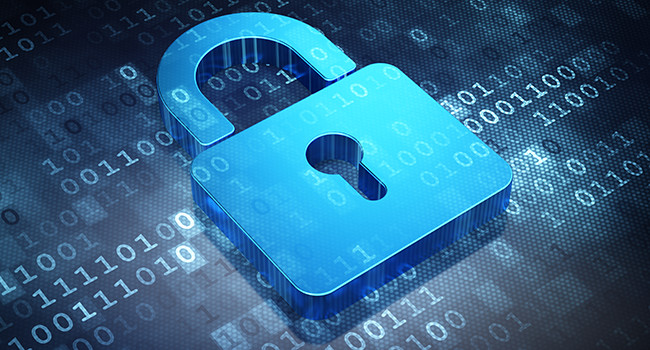

In [62]:

im = Image.open('5_Cybersecurity%20Homepage%20Feature-650x350.jpg')
im

In [63]:
from skimage import io,transform
img_file2 = io.imread('5_Cybersecurity%20Homepage%20Feature-650x350.jpg')

In [64]:
img_file2.shape

(350, 650, 3)

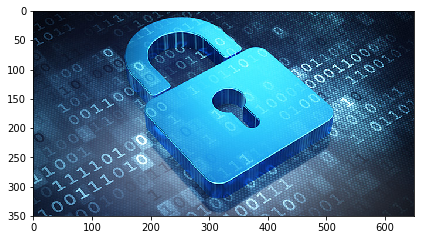

In [65]:
io.imshow(img_file2)

In [66]:
img_file2.mean()

94.59646886446886

In [69]:
im_mean=img_file2-int(img_file2.mean())

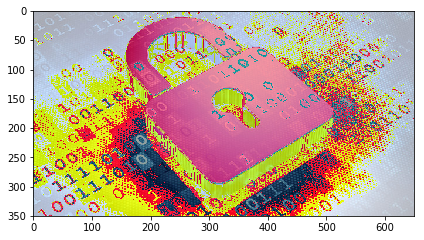

In [70]:
io.imshow(im_mean)

In [71]:
re_im=transform.resize(im_mean, (224, 224,3))

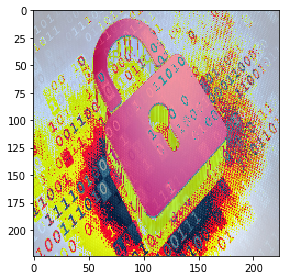

In [72]:
io.imshow(re_im)

In [76]:
path_save='final-cyber/'
images_p=images[:5]
a='cyber_'
i=0
for name in images:
    i=i+1
    try:
        im=io.imread(name)
        im_submean=im-int(im.mean())
        re_im=transform.resize(im_submean, (224, 224,3))
        save_str=path_save+a+str(i)+'.jpg'
        io.imsave(save_str,re_im)
    except:
        pass
        


1. resize finished for vgg 16.
2. subtract mean for each image for trainning
3. build a basic vgg with feature extraction in different layer
4. cannot solve visulization for feature extraction
5. hog+svm vs vgg16